In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l2(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # and mse ?

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Epoch 1/100
235/235 - 2s - loss: 0.2966 - val_loss: 0.2054 - 2s/epoch - 7ms/step
Epoch 2/100
235/235 - 1s - loss: 0.1868 - val_loss: 0.1707 - 942ms/epoch - 4ms/step
Epoch 3/100
235/235 - 1s - loss: 0.1624 - val_loss: 0.1529 - 864ms/epoch - 4ms/step
Epoch 4/100
235/235 - 1s - loss: 0.1479 - val_loss: 0.1410 - 881ms/epoch - 4ms/step
Epoch 5/100
235/235 - 1s - loss: 0.1377 - val_loss: 0.1321 - 924ms/epoch - 4ms/step
Epoch 6/100
235/235 - 1s - loss: 0.1297 - val_loss: 0.1251 - 929ms/epoch - 4ms/step
Epoch 7/100
235/235 - 1s - loss: 0.1237 - val_loss: 0.1199 - 909ms/epoch - 4ms/step
Epoch 8/100
235/235 - 1s - loss: 0.1193 - val_loss: 0.1163 - 942ms/epoch - 4ms/step
Epoch 9/100
235/235 - 1s - loss: 0.1162 - val_loss: 0.1136 - 899ms/epoch - 4ms/step
Epoch 10/100
235/235 - 1s - loss: 0.1138 - val_loss: 0.1115 - 897ms/epoch - 4ms/step
Epoch 11/100
235/235 - 1s - loss: 0.1120 - val_loss: 0.1099 - 936ms/epoch - 4ms/step
Epoch 12/100
235/235 - 1s - loss: 0.1106 - val_loss: 0.1087 - 948ms/epoch - 4

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

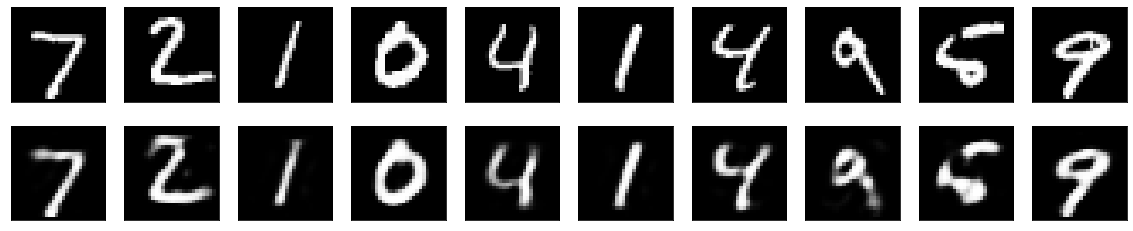

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
encoded_imgs_embedded = TSNE(n_components=2).fit_transform(encoded_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
encoded_imgs_embedded.shape

(10000, 2)

In [ ]:
(_, _), (_, y_test) = mnist.load_data()

In [ ]:
colors = y_test

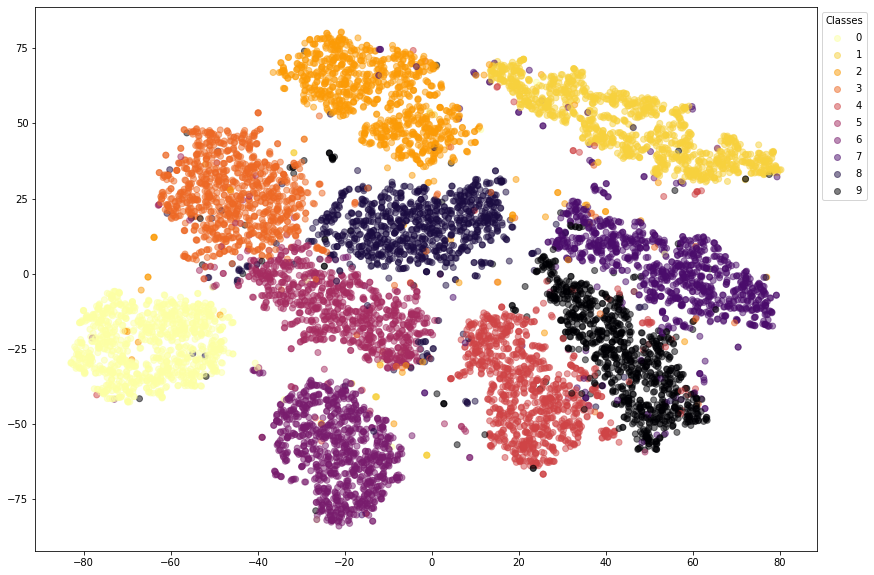

In [ ]:
plt.rcParams["figure.figsize"] = (14, 10)

fig, ax = plt.subplots()
scatter = ax.scatter(encoded_imgs_embedded[:,0], 
            encoded_imgs_embedded[:,1], 
            c=colors,  cmap=plt.cm.inferno_r, alpha=0.5)
ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1,1))
plt.show()